In [1]:
!kaggle datasets download -d teteuvinicius/1946-present-nba-player-stats-regular-season


Dataset URL: https://www.kaggle.com/datasets/teteuvinicius/1946-present-nba-player-stats-regular-season
License(s): unknown
1946-present-nba-player-stats-regular-season.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
import zipfile

with zipfile.ZipFile("1946-present-nba-player-stats-regular-season.zip","r") as zip_ref:
    zip_ref.extractall("nba_player_data")


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("teteuvinicius/1946-present-nba-player-stats-regular-season")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\sober\.cache\kagglehub\datasets\teteuvinicius\1946-present-nba-player-stats-regular-season\versions\6


In [4]:
import zipfile

with zipfile.ZipFile("1946-present-nba-player-stats-regular-season.zip","r") as zip_ref:
    zip_ref.extractall("nba_player_data")


In [5]:
import pandas as pd
import os

# List all files in folder
player_files = [f for f in os.listdir("nba_player_data") if f.endswith(".xlsx")]
print(player_files)  # see all seasons available


['1946 - Present - NBA Player Stats.xlsx', '1946- BAA Player Stats.xlsx', '1947 - BAA Player Stats.xlsx', '1948 - BAA Player Stats.xlsx', '1949 - NBA Player Stats.xlsx', '1950 - NBA Player Stats.xlsx', '1951 - NBA Player Stats.xlsx', '1952 - NBA Player Stats.xlsx', '1953 - NBA Player Stats.xlsx', '1954 - NBA Player Stats.xlsx', '1955 - NBA Player Stats.xlsx', '1956 - NBA Player Stats.xlsx', '1957 - NBA Player Stats.xlsx', '1958 - NBA Player Stats.xlsx', '1959 - NBA Player Stats.xlsx', '1960 - NBA Player Stats.xlsx', '1961 - NBA Player Stats.xlsx', '1962 - NBA Player Stats.xlsx', '1963 - NBA Player Stats.xlsx', '1964 - NBA Player Stats.xlsx', '1965 - NBA Player Stats.xlsx', '1966 - NBA Player Stats.xlsx', '1967 - ABA Player Stats.xlsx', '1967 - NBA Player Stats.xlsx', '1968 - ABA Player Stats.xlsx', '1968 - NBA Player Stats.xlsx', '1969 - ABA Player Stats.xlsx', '1969 - NBA Player Stats.xlsx', '1970 - ABA Player Stats.xlsx', '1970 - NBA Player Stats.xlsx', '1971 - ABA Player Stats.xlsx'

In [6]:
player_dfs = []
for f in player_files:
    try:
        year = int(f.split(" ")[0])  # extract year from filename
    except:
        continue  # skip non-year files

    if year >= 2005:  # last 20 years
        df = pd.read_excel(os.path.join("nba_player_data", f))
        df["Season"] = year
        player_dfs.append(df)

players = pd.concat(player_dfs, ignore_index=True)
print(players.head())
print(players["Season"].unique())


   Rk          Player  Age Team Pos   G  GS    MP    FG   FGA  ...  AST  STL  \
0   1     Kobe Bryant   27  LAL  SG  80  80  41.0  12.2  27.2  ...  4.5  1.8   
1   2   Allen Iverson   30  PHI  PG  72  72  43.1  11.3  25.3  ...  7.4  1.9   
2   3    LeBron James   21  CLE  SF  79  79  42.5  11.1  23.1  ...  6.6  1.6   
3   4  Gilbert Arenas   24  WAS  PG  80  80  42.3   9.3  20.9  ...  6.1  2.0   
4   5     Dwyane Wade   24  MIA  SG  75  75  38.6   9.3  18.8  ...  6.7  1.9   

   BLK  TOV   PF   PTS           Awards  ANO_TEMPORADA  LIGA  Season  
0  0.4  3.1  2.9  35.4  MVP-4ASNBA1DEF1           2005   NBA    2005  
1  0.1  3.4  1.7  33.0     MVP-10ASNBA3           2005   NBA    2005  
2  0.8  3.3  2.3  31.4      MVP-2ASNBA1           2005   NBA    2005  
3  0.3  3.7  3.6  29.3           ASNBA3           2005   NBA    2005  
4  0.8  3.6  2.9  27.2      MVP-6ASNBA2           2005   NBA    2005  

[5 rows x 34 columns]
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018

In [7]:
# Drop junk columns
players = players.drop(columns=[col for col in players.columns if "Unnamed" in col], errors="ignore")

# Drop rows without player/team
players = players.dropna(subset=["Player", "Team"])

# Standardize team names
players["Team"] = players["Team"].str.strip().str.upper()

# Ensure numeric
players["3P"] = pd.to_numeric(players["3P"], errors="coerce").fillna(0)
players["3PA"] = pd.to_numeric(players["3PA"], errors="coerce").fillna(0)


In [8]:
season_3pt = players.groupby("Season", as_index=False).agg({
    "3P": "sum",
    "3PA": "sum"
})

print(season_3pt.head())


   Season     3P    3PA
0    2005  252.8  723.5
1    2006  255.7  725.6
2    2007  291.5  832.0
3    2008  315.5  875.6
4    2009  301.5  870.4


In [9]:
season_3pt["3P%"] = season_3pt["3P"] / season_3pt["3PA"] * 100
season_3pt.head()


,Season,3P,3PA,3P%
0,2005,252.8,723.5,34.941258
1,2006,255.7,725.6,35.239802
2,2007,291.5,832.0,35.036058
3,2008,315.5,875.6,36.032435
4,2009,301.5,870.4,34.639246


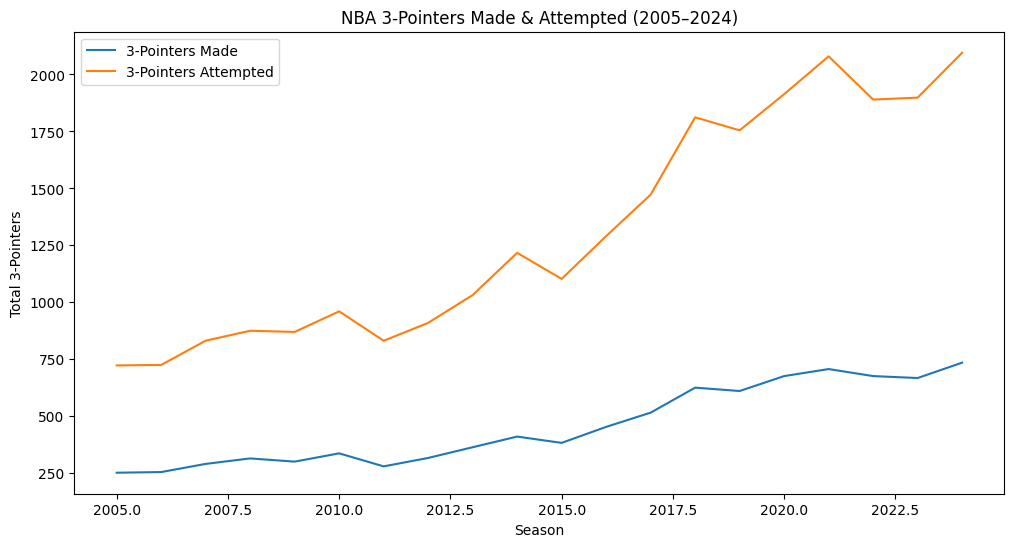

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=season_3pt, x="Season", y="3P", label="3-Pointers Made")
sns.lineplot(data=season_3pt, x="Season", y="3PA", label="3-Pointers Attempted")
plt.title("NBA 3-Pointers Made & Attempted (2005–2024)")
plt.xlabel("Season")
plt.ylabel("Total 3-Pointers")
plt.legend()
plt.show()


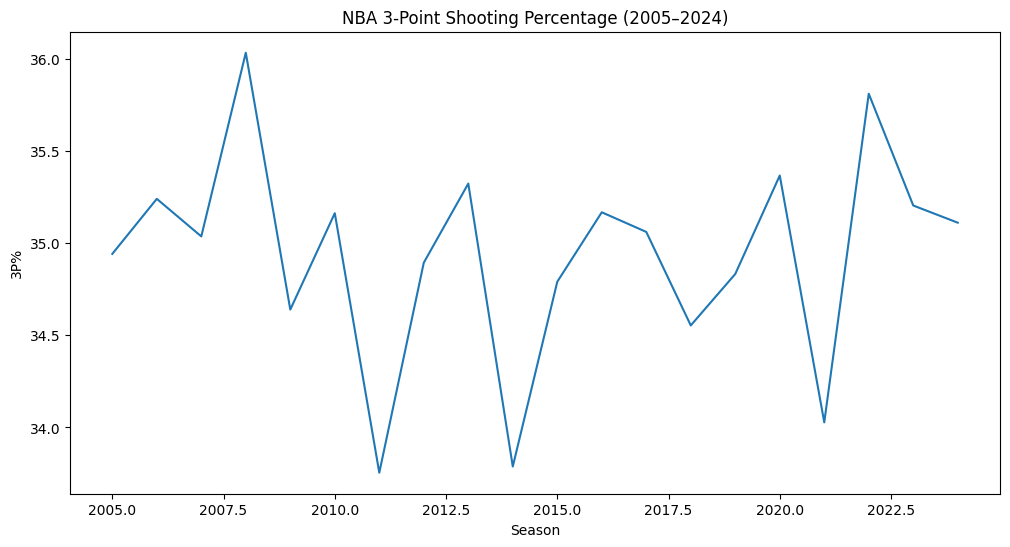

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=season_3pt, x="Season", y="3P%")
plt.title("NBA 3-Point Shooting Percentage (2005–2024)")
plt.xlabel("Season")
plt.ylabel("3P%")
plt.show()


In [14]:
season_3pt.to_csv("nba_3p_trends_2005-2024.csv", index=False)


In [25]:
import zipfile

with zipfile.ZipFile("nba-championship-winning-metrics-2004-2024.zip", "r") as zip_ref:
    zip_ref.extractall("nba_team_data")


In [26]:
print(os.listdir("nba_team_data"))


['average_scoring_margin', 'defensive_efficiency', 'efg_pct', 'opponent_efg_pct', 'win_pct']


In [28]:
import os
print(os.listdir())


['.Albion Online Launcher', '.android', '.cache', '.ccp', '.InstallAnywhere', '.ipynb_checkpoints', '.ipython', '.jupyter', '.kaggle', '.matplotlib', '.mputils', '.QtWebEngineProcess', '.runelite', '1946-present-nba-player-stats-regular-season.zip', 'ansel', 'AppData', 'Application Data', 'CE3S1PRO_SpikyDragon_wL.gcode', 'Contacts', 'Cookies', 'curseforge', 'Documents', 'Downloads', 'Favorites', 'Games', 'get-pip.py', 'Links', 'Local Settings', 'Music', 'My Documents', 'nba-championship-winning-metrics-2004-2024.zip', 'nba_3p_trends_2005-2024.csv', 'nba_data', 'nba_player_data', 'nba_team_data', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo

In [31]:
import os
import zipfile
import pandas as pd

# Step 1 — Download dataset
!kaggle datasets download -d adityarao127/nba-championship-winning-metrics-2004-2024 --force

# Step 2 — Extract dataset
zip_filename = "nba-championship-winning-metrics-2004-2024.zip"
extract_folder = "nba_team_data"

with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted files to: {extract_folder}")
print(os.listdir(extract_folder))


Dataset URL: https://www.kaggle.com/datasets/adityarao127/nba-championship-winning-metrics-2004-2024
License(s): MIT

Extracted files to: nba_team_data
['average_scoring_margin', 'defensive_efficiency', 'efg_pct', 'opponent_efg_pct', 'win_pct']



  0%|          | 0.00/55.8k [00:00<?, ?B/s]
100%|##########| 55.8k/55.8k [00:00<00:00, 73.6MB/s]


In [32]:
# Find the first CSV or Excel file in extracted folder
champ_file = None
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.endswith(".csv") or file.endswith(".xlsx"):
            champ_file = os.path.join(root, file)
            break
    if champ_file:
        break

if not champ_file:
    raise FileNotFoundError("No CSV or Excel file found in extracted data.")

print(f"Found file: {champ_file}")


Found file: nba_team_data\average_scoring_margin\average_scoring_margin_2004.csv


In [33]:
# Load file depending on extension
if champ_file.endswith(".csv"):
    champ = pd.read_csv(champ_file)
elif champ_file.endswith(".xlsx"):
    champ = pd.read_excel(champ_file)
else:
    raise Exception("Unsupported file type.")

print(champ.head())
print(champ.columns)


   Rank         Team  Statistic
0     1  San Antonio        6.8
1     2      Detroit        6.0
2     3      Indiana        5.5
3     4    Minnesota        4.5
4     5   Sacramento        4.4
Index(['Rank', 'Team', 'Statistic'], dtype='object')
